### MIS 64061 Assignment_1: Exploring a Neural Network Model
#### Eyob Tadele
02/20/2022
****
#### Project Objective
The objective of this assignment is to explore and extend the fundamental concepts of a Neural Network model making use of the IMDB dataset. This is done by changing and modifying some of the neural network components such as layers, loss functions, activations, and analyzing their respective effects on performance.
****
The baseline model, which will be used as the basis for comparison, is made out of two hidden layers consisting of 16 units each. Accuracy and loss for the training and validation sets are as follows: 

In [95]:
from IPython.display import HTML, display
display(HTML("<table><tr><td><img src='img/blAcc.png'></td><td><img src='img/blLoss.png'></td></tr></table>"))

,


From the graph displayed above, it can be inferred that validation data for the baseline model starts to overfit approximately after about 4 epochs. The subsequent steps below attempt to make changes to the different components of the baseline neural network model and observe its effects on Accuracy/Loss. 

**1. Modifying the model to use three hidden layers and compare the result to the baseline model:**

In [96]:
from IPython.display import HTML, display
display(HTML("<table><tr><td><img src='img/l3Accr.png'></td><td><img src='img/l3Lss.png'></td></tr></table>"))

,


Comparing the accuracy of the three-layer model with the original baseline model, it quickly tends to overfit right after the first epoch. This may indicate that the model might have a bit more capacity than the problem actually warrants. Hence, the immediate overfit of the model. A simpler model might suffice.

**2. Modifying the baseline model to use 64 hidden units to each of the existing two layers:**

In [97]:
from IPython.display import HTML, display
display(HTML("<table><tr><td><img src='img/64huAcc.png'></td><td><img src='img/64huLoss.png'></td></tr></table>"))

,


It can be observed from the figure above that the model with 64 hidden units starts to overfit immediately after two epochs. This can again be a sign of model overkill, where it is too complex for the for the problem space. A less complex model might address this more efficiently.

**3. Using 'mse' loss function, instead of 'binary_crossentropy'**

In [98]:
from IPython.display import HTML, display
display(HTML("<table><tr><td><img src='img/mseAcc.png'></td><td><img src='img/mseLoss.png'></td></tr></table>"))

,


Applying the mse loss function has the impact of making the validation set more resistant to overfitting than the baseline model that used binary_crossentropy. This might be due to the fact that mse does not penalize misclassifications enough. Additionally, mse is more suited towards regression problems. This specific problem is a multi-class classification and binary_crossentropy is a better measure.

**4. Modifying the baseline model by changing the activation of the layers to 'tanh', instead of 'relu'.**

In [99]:
from IPython.display import HTML, display
display(HTML("<table><tr><td><img src='img/tanhAcc.png'></td><td><img src='img/tanhLoss.png'></td></tr></table>"))

,


It can be inferred from the accuracy and loss graphs above that 'relu' appears to be better suited for this model. It tends to overfit rather quickly when using 'tanh' activation. This may be due to the fact that tanh is not best suited when it is essential to remove unimportant neurons to reduce complexity (i.e., tanh usually produces non-sparse models that usually produce output values). From the previous iterations of changes, we can see that this problem requires a less complex model. 

**5. Improving the baseline model to perform better on the validation set by applying different techniques.**

Based on what has been observed from the previous steps that applied different alternatives, it is a good idea to make the model a little less complex. This can be achieved through regularization, where a cost is tied to the model to penalize complexity. Also, adding dropout to the model can help in improving the performance.

In [100]:
from IPython.display import HTML, display
display(HTML("<table><tr><td><img src='img/l2regAcc.png'></td><td><img src='img/l2regLoss.png'></td></tr></table>"))

,


With the application of l2 regularization penalty, the new model is more resistant to overfitting when compared with the baseline model. However, a definitive improvement on accuracy is not observed. An alternative method is used below to see if there is a marked improvement.

In [102]:
from IPython.display import HTML, display
display(HTML("<table><tr><td><img src='img/dropAcc.png'></td><td><img src='img/dropL.png'></td></tr></table>"))

,


Applying dropout as the regularization method above shows a clear improvement in accuracy/loss. We can see a longer curve before overfitting and an overall improvement in accuracy, when compared with the baseline validation.

In [ ]:
from IPython.display import display, Math, Latex
display(Latex(r"\newpage"))

### Reference 

A detailed run of all the code is indicated below as reference for more information.

In [10]:
# loading the IMDB dataset
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [11]:
# encoding the integer sequences using multi-hot encoding
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [12]:
# model definition
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

Metal device set to: Apple M1 Pro


2022-02-27 12:00:51.241779: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-02-27 12:00:51.241949: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [13]:
# model compilation
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [14]:
# setting aside a validation set 
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [15]:
# training the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20


2022-02-27 12:01:05.733314: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


 1/30 [>.............................] - ETA: 15s - loss: 0.6938 - accuracy: 0.5000

2022-02-27 12:01:06.071952: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 1s 25ms/step - loss: 0.5090 - accuracy: 0.7967 - val_loss: 0.3799 - val_accuracy: 0.8714
Epoch 2/20
 1/30 [>.............................] - ETA: 0s - loss: 0.3371 - accuracy: 0.9023

2022-02-27 12:01:06.819888: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 0s 13ms/step - loss: 0.2979 - accuracy: 0.9038 - val_loss: 0.3098 - val_accuracy: 0.8790
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2151 - accuracy: 0.9282 - val_loss: 0.2824 - val_accuracy: 0.8868
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1660 - accuracy: 0.9443 - val_loss: 0.2764 - val_accuracy: 0.8876
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1321 - accuracy: 0.9594 - val_loss: 0.2874 - val_accuracy: 0.8854
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1135 - accuracy: 0.9656 - val_loss: 0.3196 - val_accuracy: 0.8803
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0896 - accuracy: 0.9737 - val_loss: 0.3211 - val_accuracy: 0.8819
Epoch 8/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0775 - accuracy: 0.9780 - val_loss: 0.3691 - val_accuracy: 0.8769
Epoch 9/20
30/30 [======

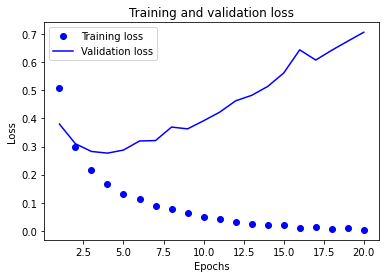

In [16]:
# plotting the training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

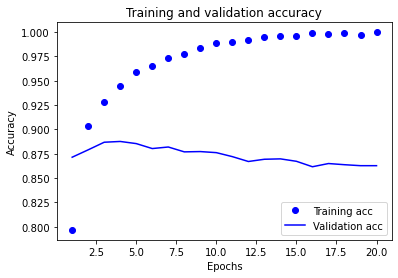

In [17]:
# plotting the training and validation accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [18]:
# model definition with three hidden layers
model3l = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [19]:
# model compilation
model3l.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [20]:
# training the model
history3l = model3l.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
 1/30 [>.............................] - ETA: 10s - loss: 0.6937 - accuracy: 0.4922

2022-02-27 12:02:00.281977: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 1s 26ms/step - loss: 0.5230 - accuracy: 0.7753 - val_loss: 0.4197 - val_accuracy: 0.8278
Epoch 2/20


2022-02-27 12:02:01.023523: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 0s 14ms/step - loss: 0.3050 - accuracy: 0.9006 - val_loss: 0.2992 - val_accuracy: 0.8906
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2192 - accuracy: 0.9264 - val_loss: 0.3243 - val_accuracy: 0.8684
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1667 - accuracy: 0.9436 - val_loss: 0.2816 - val_accuracy: 0.8870
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1358 - accuracy: 0.9553 - val_loss: 0.2916 - val_accuracy: 0.8858
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1101 - accuracy: 0.9646 - val_loss: 0.3053 - val_accuracy: 0.8857
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0868 - accuracy: 0.9730 - val_loss: 0.3276 - val_accuracy: 0.8826
Epoch 8/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0708 - accuracy: 0.9806 - val_loss: 0.3616 - val_accuracy: 0.8766
Epoch 9/20
30/30 [======

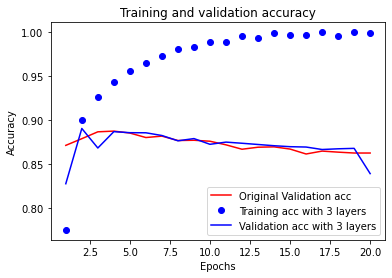

In [25]:
# plotting the training and validation accuracy with three layers
import matplotlib.pyplot as plt

history_dict0 = history.history
val_acc0 = history_dict0["val_accuracy"]

history_dict = history3l.history
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
epochs = range(1, len(acc) + 1)

plt.plot(epochs, val_acc0, "r", label="Original Validation acc")

plt.plot(epochs, acc, "bo", label="Training acc with 3 layers")
plt.plot(epochs, val_acc, "b", label="Validation acc with 3 layers")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

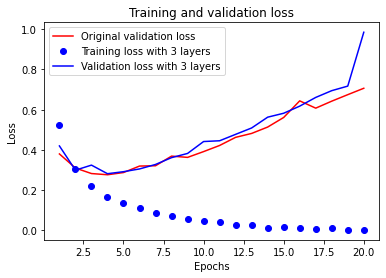

In [26]:
# plotting the training and validation loss with three layers
plt.clf()

history_dict0 = history.history
val_loss_values0 = history_dict0["val_loss"]

history_dict = history3l.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, val_loss_values0, "r", label="Original validation loss")

plt.plot(epochs, loss_values, "bo", label="Training loss with 3 layers")
plt.plot(epochs, val_loss_values, "b", label="Validation loss with 3 layers")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [27]:
# model definition with one hidden layer
model1l = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [28]:
# model compilation
model1l.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [29]:
# training the model
history1l = model1l.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
 1/30 [>.............................] - ETA: 8s - loss: 0.6947 - accuracy: 0.4961

2022-02-27 12:07:56.553578: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 1s 25ms/step - loss: 0.5014 - accuracy: 0.8001 - val_loss: 0.4081 - val_accuracy: 0.8526
Epoch 2/20
 1/30 [>.............................] - ETA: 0s - loss: 0.3687 - accuracy: 0.8711

2022-02-27 12:07:57.220678: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 0s 13ms/step - loss: 0.3217 - accuracy: 0.9020 - val_loss: 0.3299 - val_accuracy: 0.8763
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2502 - accuracy: 0.9230 - val_loss: 0.2920 - val_accuracy: 0.8880
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2051 - accuracy: 0.9367 - val_loss: 0.2991 - val_accuracy: 0.8792
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1743 - accuracy: 0.9460 - val_loss: 0.2824 - val_accuracy: 0.8876
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1503 - accuracy: 0.9557 - val_loss: 0.2787 - val_accuracy: 0.8865
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1310 - accuracy: 0.9619 - val_loss: 0.2932 - val_accuracy: 0.8840
Epoch 8/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1145 - accuracy: 0.9683 - val_loss: 0.2851 - val_accuracy: 0.8874
Epoch 9/20
30/30 [======

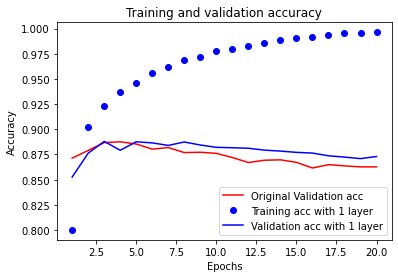

In [32]:
# plotting the training and validation accuracy with one layer
plt.clf()

history_dict0 = history.history
val_acc0 = history_dict0["val_accuracy"]


history_dict = history1l.history
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
epochs = range(1, len(acc) + 1)

plt.plot(epochs, val_acc0, "r", label="Original Validation acc")

plt.plot(epochs, acc, "bo", label="Training acc with 1 layer")
plt.plot(epochs, val_acc, "b", label="Validation acc with 1 layer")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

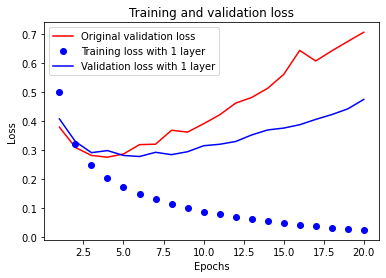

In [31]:
# plotting the training and validation loss with one layer
plt.clf()

history_dict0 = history.history
val_loss_values0 = history_dict0["val_loss"]

history_dict = history1l.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, val_loss_values0, "r", label="Original validation loss")

plt.plot(epochs, loss_values, "bo", label="Training loss with 1 layer")
plt.plot(epochs, val_loss_values, "b", label="Validation loss with 1 layer")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

2. Modifying the baseline model by applying 32 and 64 hidden units respectively, and compare training and validation accuracies.

In [38]:
# model definition with two 32 hidden units
model32hu = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [39]:
# model compilation
model32hu.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [40]:
# training the model
history32hu = model32hu.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
 1/30 [>.............................] - ETA: 11s - loss: 0.6975 - accuracy: 0.4531

2022-02-27 12:38:22.402812: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - ETA: 0s - loss: 0.4956 - accuracy: 0.7837

2022-02-27 12:38:23.189058: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 1s 28ms/step - loss: 0.4956 - accuracy: 0.7837 - val_loss: 0.3579 - val_accuracy: 0.8707
Epoch 2/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2788 - accuracy: 0.9047 - val_loss: 0.2875 - val_accuracy: 0.8887
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2022 - accuracy: 0.9307 - val_loss: 0.2799 - val_accuracy: 0.8877
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1557 - accuracy: 0.9475 - val_loss: 0.3073 - val_accuracy: 0.8768
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1237 - accuracy: 0.9598 - val_loss: 0.3773 - val_accuracy: 0.8603
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0967 - accuracy: 0.9697 - val_loss: 0.3178 - val_accuracy: 0.8844
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0772 - accuracy: 0.9766 - val_loss: 0.3422 - val_accuracy: 0.8786
Epoch 8/20
30/30 [======

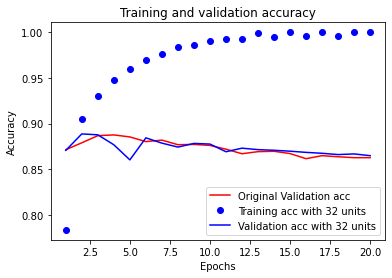

In [43]:
# plotting the training and validation accuracy with 32 hidden units
plt.clf()

history_dict0 = history.history
val_acc0 = history_dict0["val_accuracy"]

history_dict = history32hu.history
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
epochs = range(1, len(acc) + 1)

plt.plot(epochs, val_acc0, "r", label="Original Validation acc")

plt.plot(epochs, acc, "bo", label="Training acc with 32 units")
plt.plot(epochs, val_acc, "b", label="Validation acc with 32 units")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

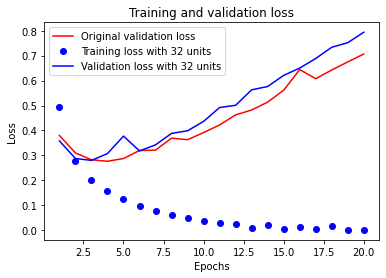

In [44]:
# plotting the training and validation loss with 32 hidden units
plt.clf()

history_dict0 = history.history
val_loss_values0 = history_dict0["val_loss"]

history_dict = history32hu.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, val_loss_values0, "r", label="Original validation loss")

plt.plot(epochs, loss_values, "bo", label="Training loss with 32 units")
plt.plot(epochs, val_loss_values, "b", label="Validation loss with 32 units")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [45]:
# model definition with two 64 hidden units
model64hu = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [46]:
# model compilation
model64hu.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [47]:
# training the model
history64hu = model64hu.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20


2022-02-27 12:39:38.967830: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - ETA: 0s - loss: 0.4763 - accuracy: 0.7845

2022-02-27 12:39:39.716868: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 1s 25ms/step - loss: 0.4763 - accuracy: 0.7845 - val_loss: 0.4389 - val_accuracy: 0.7982
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2553 - accuracy: 0.9055 - val_loss: 0.2762 - val_accuracy: 0.8916
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1913 - accuracy: 0.9299 - val_loss: 0.2814 - val_accuracy: 0.8904
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1403 - accuracy: 0.9508 - val_loss: 0.3013 - val_accuracy: 0.8835
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1012 - accuracy: 0.9661 - val_loss: 0.3621 - val_accuracy: 0.8729
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0782 - accuracy: 0.9749 - val_loss: 0.3467 - val_accuracy: 0.8816
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0574 - accuracy: 0.9821 - val_loss: 0.3800 - val_accuracy: 0.8810
Epoch 8/20
30/30 [======

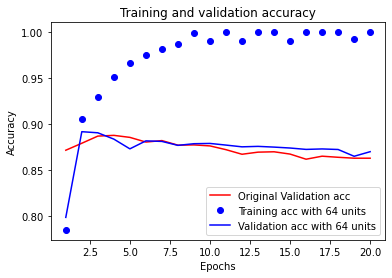

In [55]:
# plotting the training and validation accuracy with 64 hidden units
plt.clf()

history_dict0 = history.history
val_acc0 = history_dict0["val_accuracy"]

history_dict = history64hu.history
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
epochs = range(1, len(acc) + 1)

plt.plot(epochs, val_acc0, "r", label="Original Validation acc")

plt.plot(epochs, acc, "bo", label="Training acc with 64 units")
plt.plot(epochs, val_acc, "b", label="Validation acc with 64 units")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

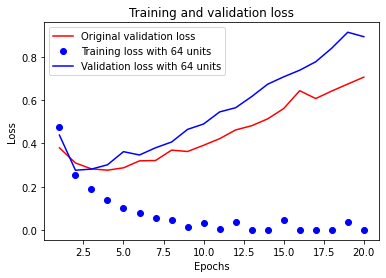

In [56]:
# plotting the training and validation loss with 64 hidden units
plt.clf()

history_dict0 = history.history
val_loss_values0 = history_dict0["val_loss"]

history_dict = history64hu.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, val_loss_values0, "r", label="Original validation loss")

plt.plot(epochs, loss_values, "bo", label="Training loss with 64 units")
plt.plot(epochs, val_loss_values, "b", label="Validation loss with 64 units")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

3. Modifying the baseline model by using mse for the loss function 

In [58]:
# model definition
model_mse = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [59]:
# model compilation
model_mse.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

In [60]:
# training the model
history_mse = model_mse.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20


2022-02-27 13:03:01.382968: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 1s 24ms/step - loss: 0.1697 - accuracy: 0.7828 - val_loss: 0.1164 - val_accuracy: 0.8746
Epoch 2/20
 1/30 [>.............................] - ETA: 0s - loss: 0.0986 - accuracy: 0.9102

2022-02-27 13:03:02.090334: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 0s 14ms/step - loss: 0.0889 - accuracy: 0.9067 - val_loss: 0.1071 - val_accuracy: 0.8632
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0638 - accuracy: 0.9322 - val_loss: 0.0850 - val_accuracy: 0.8888
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0491 - accuracy: 0.9452 - val_loss: 0.0982 - val_accuracy: 0.8644
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0389 - accuracy: 0.9580 - val_loss: 0.0841 - val_accuracy: 0.8859
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0316 - accuracy: 0.9670 - val_loss: 0.0854 - val_accuracy: 0.8827
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0252 - accuracy: 0.9749 - val_loss: 0.0882 - val_accuracy: 0.8809
Epoch 8/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0215 - accuracy: 0.9795 - val_loss: 0.0958 - val_accuracy: 0.8734
Epoch 9/20
30/30 [======

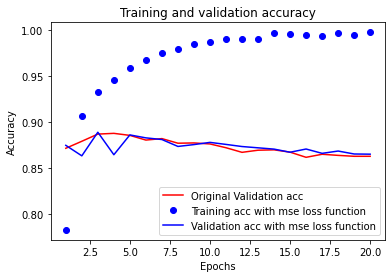

In [61]:
# plotting the training and validation accuracy with loss function mse
plt.clf()

history_dict0 = history.history
val_acc0 = history_dict0["val_accuracy"]

history_dict = history_mse.history
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
epochs = range(1, len(acc) + 1)

plt.plot(epochs, val_acc0, "r", label="Original Validation acc")

plt.plot(epochs, acc, "bo", label="Training acc with mse loss function")
plt.plot(epochs, val_acc, "b", label="Validation acc with mse loss function")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

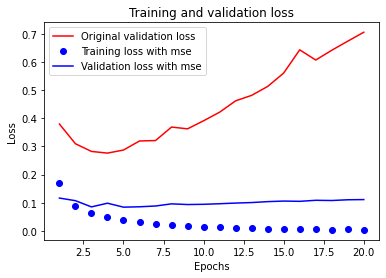

In [62]:
# plotting the training and validation loss mse loss function
plt.clf()

history_dict0 = history.history
val_loss_values0 = history_dict0["val_loss"]

history_dict = history_mse.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, val_loss_values0, "r", label="Original validation loss")

plt.plot(epochs, loss_values, "bo", label="Training loss with mse")
plt.plot(epochs, val_loss_values, "b", label="Validation loss with mse")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

4. Modifying the baseline model using tanh activation, instesd of relu.

In [64]:
# model definition with tanh activation on the input layers
model_tanh = keras.Sequential([
    layers.Dense(64, activation="tanh"),
    layers.Dense(64, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

In [65]:
# model compilation
model_tanh.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [66]:
# training the model
history_tanh = model_tanh.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20


2022-02-27 13:41:04.296548: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


29/30 [============================>.] - ETA: 0s - loss: 0.4656 - accuracy: 0.7852

2022-02-27 13:41:05.037736: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 1s 25ms/step - loss: 0.4641 - accuracy: 0.7861 - val_loss: 0.3090 - val_accuracy: 0.8779
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2305 - accuracy: 0.9104 - val_loss: 0.2787 - val_accuracy: 0.8886
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1697 - accuracy: 0.9345 - val_loss: 0.4860 - val_accuracy: 0.8298
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1387 - accuracy: 0.9495 - val_loss: 0.3256 - val_accuracy: 0.8817
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1045 - accuracy: 0.9627 - val_loss: 0.4581 - val_accuracy: 0.8549
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0830 - accuracy: 0.9732 - val_loss: 0.4196 - val_accuracy: 0.8745
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0712 - accuracy: 0.9754 - val_loss: 0.5978 - val_accuracy: 0.8442
Epoch 8/20
30/30 [======

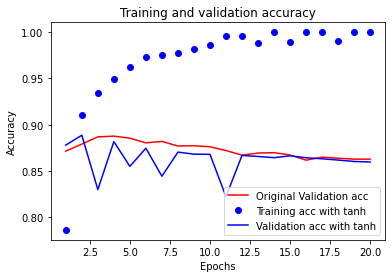

In [68]:
# plotting the training and validation accuracy with activation tanh
plt.clf()

history_dict0 = history.history
val_acc0 = history_dict0["val_accuracy"]

history_dict = history_tanh.history
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
epochs = range(1, len(acc) + 1)

plt.plot(epochs, val_acc0, "r", label="Original Validation acc")

plt.plot(epochs, acc, "bo", label="Training acc with tanh")
plt.plot(epochs, val_acc, "b", label="Validation acc with tanh")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

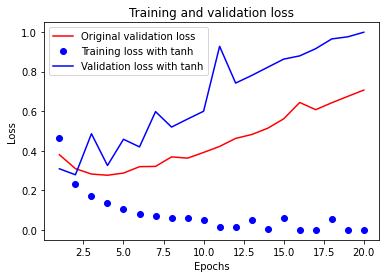

In [69]:
# plotting the training and validation loss with tanh activation
plt.clf()

history_dict0 = history.history
val_loss_values0 = history_dict0["val_loss"]

history_dict = history_tanh.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, val_loss_values0, "r", label="Original validation loss")

plt.plot(epochs, loss_values, "bo", label="Training loss with tanh")
plt.plot(epochs, val_loss_values, "b", label="Validation loss with tanh")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

5. Getting Regularization and Dropout to improve the performance on the validation set.

In [71]:
# adding L2 weight regularization to the original model
from tensorflow.keras import regularizers
model_l2 = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [72]:
model_l2.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [73]:
# training the model
history_l2 = model_l2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20


2022-02-27 14:50:11.887996: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - ETA: 0s - loss: 0.5859 - accuracy: 0.7839

2022-02-27 14:50:12.757405: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 1s 29ms/step - loss: 0.5859 - accuracy: 0.7839 - val_loss: 0.4549 - val_accuracy: 0.8699
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3878 - accuracy: 0.8989 - val_loss: 0.3834 - val_accuracy: 0.8870
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3268 - accuracy: 0.9157 - val_loss: 0.3697 - val_accuracy: 0.8862
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2912 - accuracy: 0.9313 - val_loss: 0.3657 - val_accuracy: 0.8845
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2785 - accuracy: 0.9325 - val_loss: 0.3659 - val_accuracy: 0.8831
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2644 - accuracy: 0.9393 - val_loss: 0.3642 - val_accuracy: 0.8837
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2527 - accuracy: 0.9427 - val_loss: 0.3836 - val_accuracy: 0.8791
Epoch 8/20
30/30 [======

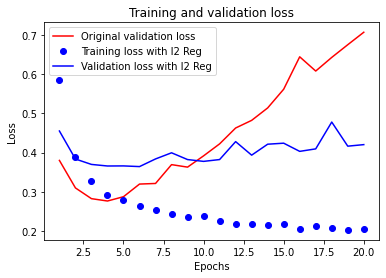

In [74]:
# plotting the training and validation loss with l2 Regularization
import matplotlib.pyplot as plt
history_dict0 = history.history
val_loss_values0 = history_dict0["val_loss"]

history_dict = history_l2.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, val_loss_values0, "r", label="Original validation loss")

plt.plot(epochs, loss_values, "bo", label="Training loss with l2 Reg")
plt.plot(epochs, val_loss_values, "b", label="Validation loss with l2 Reg")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

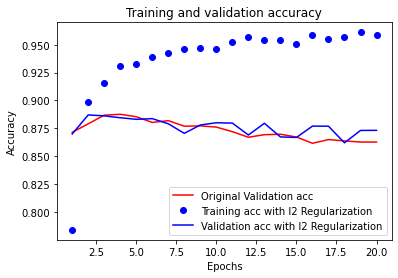

In [76]:
# plotting the training and validation accuracy with l2 Regularization
plt.clf()

history_dict0 = history.history
val_acc0 = history_dict0["val_accuracy"]

history_dict = history_l2.history
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
epochs = range(1, len(acc) + 1)

plt.plot(epochs, val_acc0, "r", label="Original Validation acc")

plt.plot(epochs, acc, "bo", label="Training acc with l2 Regularization")
plt.plot(epochs, val_acc, "b", label="Validation acc with l2 Regularization")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [77]:
# adding Dropout to the original model
model_do = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

In [78]:
model_do.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [79]:
# training the model
history_do = model_do.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20


2022-02-27 14:52:28.295109: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - ETA: 0s - loss: 0.6051 - accuracy: 0.6755

2022-02-27 14:52:29.311563: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 1s 31ms/step - loss: 0.6051 - accuracy: 0.6755 - val_loss: 0.4689 - val_accuracy: 0.8494
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.4712 - accuracy: 0.8060 - val_loss: 0.3739 - val_accuracy: 0.8737
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3922 - accuracy: 0.8524 - val_loss: 0.3269 - val_accuracy: 0.8757
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.3337 - accuracy: 0.8835 - val_loss: 0.2894 - val_accuracy: 0.8889
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2842 - accuracy: 0.9073 - val_loss: 0.2750 - val_accuracy: 0.8918
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2490 - accuracy: 0.9218 - val_loss: 0.2825 - val_accuracy: 0.8889
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2153 - accuracy: 0.9336 - val_loss: 0.2822 - val_accuracy: 0.8906
Epoch 8/20
30/30 [======

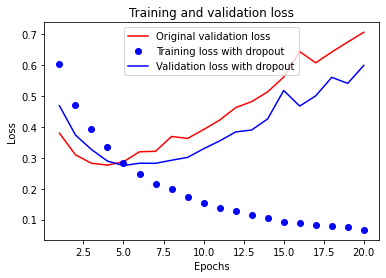

In [84]:
# plotting the training and validation loss with dropout
import matplotlib.pyplot as plt
history_dict0 = history.history
val_loss_values0 = history_dict0["val_loss"]

history_dict = history_do.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, val_loss_values0, "r", label="Original validation loss")

plt.plot(epochs, loss_values, "bo", label="Training loss with dropout")
plt.plot(epochs, val_loss_values, "b", label="Validation loss with dropout")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

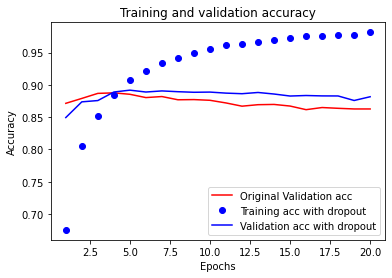

In [81]:
# plotting the training and validation accuracy with dropout
plt.clf()

history_dict0 = history.history
val_acc0 = history_dict0["val_accuracy"]

history_dict = history_do.history
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
epochs = range(1, len(acc) + 1)

plt.plot(epochs, val_acc0, "r", label="Original Validation acc")

plt.plot(epochs, acc, "bo", label="Training acc with dropout")
plt.plot(epochs, val_acc, "b", label="Validation acc with dropout")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()